<a href="https://colab.research.google.com/github/PavelStelmakhV/hw303-data-visualization/blob/main/Hw2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd

1. Прочитайте файл 2017_jun_final.csv с помощью метода read_csv

In [24]:
url = 'https://drive.google.com/file/d/1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df_init = df.copy()

2. Прочитайте полученную таблицу используя метод head

In [25]:
print(df.head())

   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       до 10 человек  ...   
1           

3. Определите размер таблицы с помощью метода shape

In [26]:
print(df.shape)

(8704, 25)


4. Определите типы всех столбцов с помощью dataframe.dtypes

In [27]:
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

5. Посчитайте, какая доля пропусков содержится в каждой колонке (используйте методы isnull и sum)

In [28]:
print(df.isnull().sum())

N                                      0
Должность                              0
Язык.программирования               3850
Специализация                       7219
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Университет                          358
Еще.студент                            0
Уровень.английского                    0
Предметная.область                   223
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
Валюта                              8694
cls             

6. Удалите все столбцы с пропусками, кроме столбца "Язык.программирования"

In [29]:
columns_for_delete = []
for column in df.columns:
  if df[column].isnull().sum() > 0:
    columns_for_delete.append(column)
columns_for_delete.remove('Язык.программирования')
df.drop(columns_for_delete, axis=1, inplace=True)

7. Опять посчитайте, какая доля пропусков содержится в каждой колонке и убедитесь, что остался только столбец "Язык.программирования"

In [30]:
print(df.isnull().sum())

N                                      0
Должность                              0
Язык.программирования               3850
Общий.опыт.работы                      0
Опыт.работы.на.текущем.месте           0
Зарплата.в.месяц                       0
Изменение.зарплаты.за.12.месяцев       0
Город                                  0
Размер.компании                        0
Тип.компании                           0
Пол                                    0
Возраст                                0
Образование                            0
Еще.студент                            0
Уровень.английского                    0
Дата.заполнения                        0
User.Agent                             0
exp                                    0
current_job_exp                        0
salary                                 0
dtype: int64


8. Удалите все строки в исходной таблице с помощью метода dropna

In [31]:
df.dropna(axis=0, inplace=True)

9. Определите новый размер таблицы с помощью метода shape

In [32]:
print(df.shape)

(4854, 20)


10. Создайте новую таблицу python_data в которой будут только строки со специалистами указавшими язык программирования Python

In [33]:
python_data = df.loc[df['Язык.программирования']=='Python']

11. Определите размер таблицы python_data с помощью метода shape

In [34]:
print(python_data.shape)

(207, 20)


12. Используя метод groupby выполните группировку по столбцу "Должность"

In [35]:
df.groupby(['Должность'])

13. Создайте новый DataFrame, где для сгруппированных данных по столбцу "Должность", выполните агрегацию данных с помощью метода agg и найдите минимальное и максимальное значение в столбце "Зарплата.в.месяц"

In [36]:
new_df = df.groupby(['Должность'])['Зарплата.в.месяц'].agg(['min', 'max']).copy()
print(new_df)

                                min    max
Должность                                 
Data Scientist / Data Analyst  2700   2700
DevOps                         7000   7000
ERP / CRM                      2000   2000
HTML coder                      385    600
Junior Software Engineer         75   2600
Product Manager                3000   3000
Senior Software Engineer        350   9200
Software Engineer               100   7000
System Architect                400  10000
Team lead                      2500   4000
Technical Lead                  500  18000


14. Создайте функцию fill_avg_salary которая будет возвращать среднее значение заработной платы в месяц. Используйте ее для метода apply и создайте новый столбик "avg"

In [37]:
def fill_avg_salary(job_title):
  return df.loc[df['Должность'] == job_title]['Зарплата.в.месяц'].mean()

df['avg'] = df.apply(lambda x: fill_avg_salary(x['Должность']), axis =  1)

15. Создайте описательную статистику с помощью метода describe для нового столбца.

In [38]:
df['avg'].describe()

count    4854.000000
mean     1883.371034
std      1056.802546
min       457.000000
25%       605.658594
50%      1678.630074
75%      3243.200926
max      7000.000000
Name: avg, dtype: float64

16. Сохраните полученную таблицу в CSV файл

In [19]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/output.csv'
with open(path, 'w', encoding = 'utf-8-sig') as fh:
  df.to_csv(fh)

Mounted at /content/drive


# Визуализация данных

In [81]:
import matplotlib.pyplot as plt
df_salary = new_df.sort_values('max').copy()

In [82]:
df_salary.index

Index(['HTML coder', 'ERP / CRM', 'Junior Software Engineer',
       'Data Scientist / Data Analyst', 'Product Manager', 'Team lead',
       'DevOps', 'Software Engineer', 'Senior Software Engineer',
       'System Architect', 'Technical Lead'],
      dtype='object', name='Должность')

In [83]:
df_salary['min']

Должность
HTML coder                        385
ERP / CRM                        2000
Junior Software Engineer           75
Data Scientist / Data Analyst    2700
Product Manager                  3000
Team lead                        2500
DevOps                           7000
Software Engineer                 100
Senior Software Engineer          350
System Architect                  400
Technical Lead                    500
Name: min, dtype: int64

In [84]:
df_salary['max']

Должность
HTML coder                         600
ERP / CRM                         2000
Junior Software Engineer          2600
Data Scientist / Data Analyst     2700
Product Manager                   3000
Team lead                         4000
DevOps                            7000
Software Engineer                 7000
Senior Software Engineer          9200
System Architect                 10000
Technical Lead                   18000
Name: max, dtype: int64

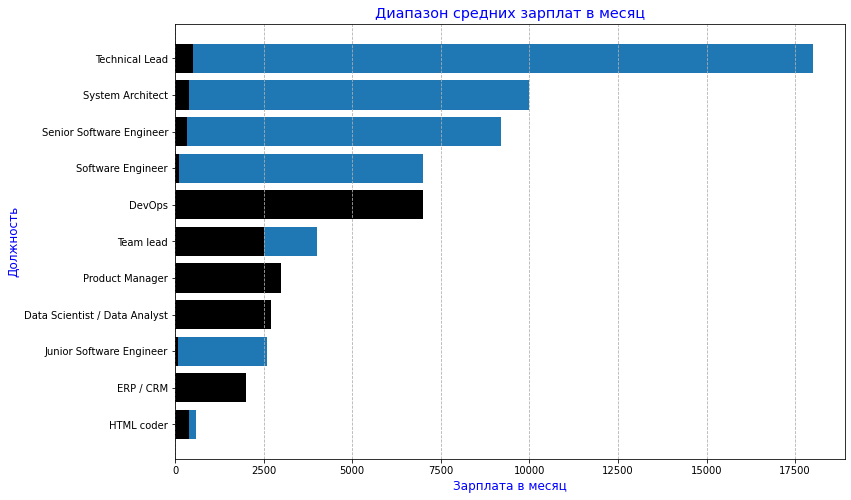

In [88]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(df_salary.index, df_salary['max'])
ax.barh(df_salary.index, df_salary['min'], color='black')

# ax = new_df.plot.barh(stacked=False, color={"min": "black", "max": "green"}, figsize=(12, 8), legend=False, width = 0.5)
# ax.set_facecolor('seashell')
# ax.bar_label(ax.containers [ 0 ])
# ax.bar_label(ax.containers [ 1 ])
plt.title('Диапазон средних зарплат в месяц', color = 'blue', fontsize = 'x-large')
plt.xlabel('Зарплата в месяц', color = 'blue', fontsize = 'large')
plt.ylabel('Должность', color = 'blue', fontsize = 'large')
plt.grid(ls = '--', axis = 'x')


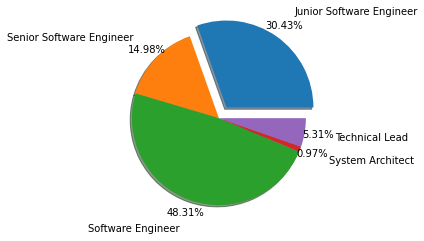

In [22]:

labels = [
    "Junior Software Engineer",
    "Senior Software Engineer",
    "Software Engineer",
    "System Architect",
    "Technical Lead",
]

data = [63, 31, 100, 2, 11]
explode = [0.15, 0, 0, 0, 0]
plt.pie(
    data,
    labels=labels,
    shadow=True,
    explode=explode,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()

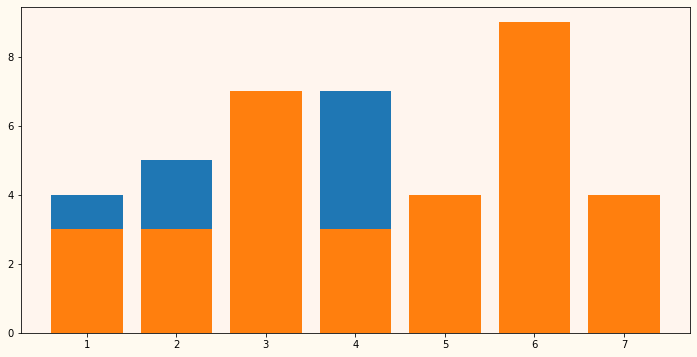

In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 8)
y1 = np.random.randint(1, 10, size = 7)
y2 = np.random.randint(1, 10, size = 7)

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(6)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()